# Food Image Classification with Hugging Face

## Akash Kharita

<p align="center">
  <img src="Food class_2.png" alt="Food class_2" width="500">
</p>

A popular social media platform dedicated to food enthusiasts wants to improve user engagement by adding advanced image recognition features. As a machine learning engineer, you are tasked with developing a food image classification system using Hugging Face's state-of-the-art models. This system will automatically identify and categorize food items in user-uploaded photos, allowing for better content organization and personalized food content recommendations.

Your responsibility is to develop a robust food category image classification system using pre-trained models from Hugging Face.

The goal is to enhance user interaction by providing accurate food classification, enabling users to easily find and engage with content related to their favorite foods, and improving the overall experience on the platform.

In this dynamic project, we leverage the power of PyTorch and transformers, utilizing an open-source model from Hugging Face as the backbone of our solution.

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from transformers import pipeline
from transformers.utils import logging
# Only show error messages from the transformers library to reduce the amount of log output
logging.set_verbosity_error()

import warnings
# Ignore all Python warnings to keep the output clean
warnings.filterwarnings("ignore")

In [3]:
# Helper function to convert image to RGB format
def convert_to_rgb(image):
    """
    Converts an image to RGB format.

    Parameters:
    image (PIL.Image): An image object.

    Returns:
    PIL.Image: Image object in RGB format.
    """
    return image.convert('RGB')



def display_image(image):
    plt.imshow(image)
    plt.axis('off')  # Hide axis ticks
    plt.title("Input Food Image")
    plt.show()

## Goal of the Project
- Use pre-trained food image classification models from the Hugging Face
- Classify a given food image and get probabilities for each category.
- Save results as a list of dictionaries  - class_scores = [{'label':....,'score':..}]

### Step 1: Load a suitable Hugging Face Model. 

There are two ways to search for a suitable model on the Hugging Face
- Through the hugging face website
Go to search bar, type "food ", and use the task bar on the left to filter based on most downloads, likes or trending etc.
- Programmatically, through hugging face API. I will show the programmatic way of searching for the hugging face models for a given task

In [4]:
from huggingface_hub import HfApi
api = HfApi()

# search models for food classification
models = api.list_models(
    filter = "image-classification",  # we only want image classification, so basically we are telling the task we are looking for, it simplies the search, we could say - 'translation', 'summarization', etc. 
    search = "food", # this tells the function that there should be "Food" in the name of the model, 
    sort = "likes", # this will sort all the models based on likes, we could sort by downloads or trending whatever our preferences are. 
    
)

Ok, so `models` is a list of model objects. Lets print the top five models

In [5]:
# Print top model names
for model in models[:5]:
    print(model.modelId)

nateraw/food
Kaludi/food-category-classification-v2.0
skylord/swin-finetuned-food101
nateraw/baseball-stadium-foods
nateraw/vit-base-food101


Note that modelID = 'author/model_name'

- modelID can be of great use when loading models using pipeline so for example - 
`from transformers import pipeline
pipe = pipeline(task = 'image-classification', model = models[0].modelId)`

- to clone or pull weights, e.g.,
`from transformers import AutoModel
model = AutoModel.from_pretrained("google/bert-base-uncased")
`

### Seems like nateraw/food is a popular model based on the likes. 

More information about this model. 

nateraw/food is a ResNet50 architecture model trained on Food101 dataset. 

ResNet50 is a residual network based image classification model
Food101 is a food image dataset, it contains 
- 101 categories of food
- 1000 images per category

## Step 2. Using this pretrained model to classify image. 

PIL stands for Python Imaging Library. (Pillow is a modern version)
Image class is used to read, resize and scale the images

Displaying original image


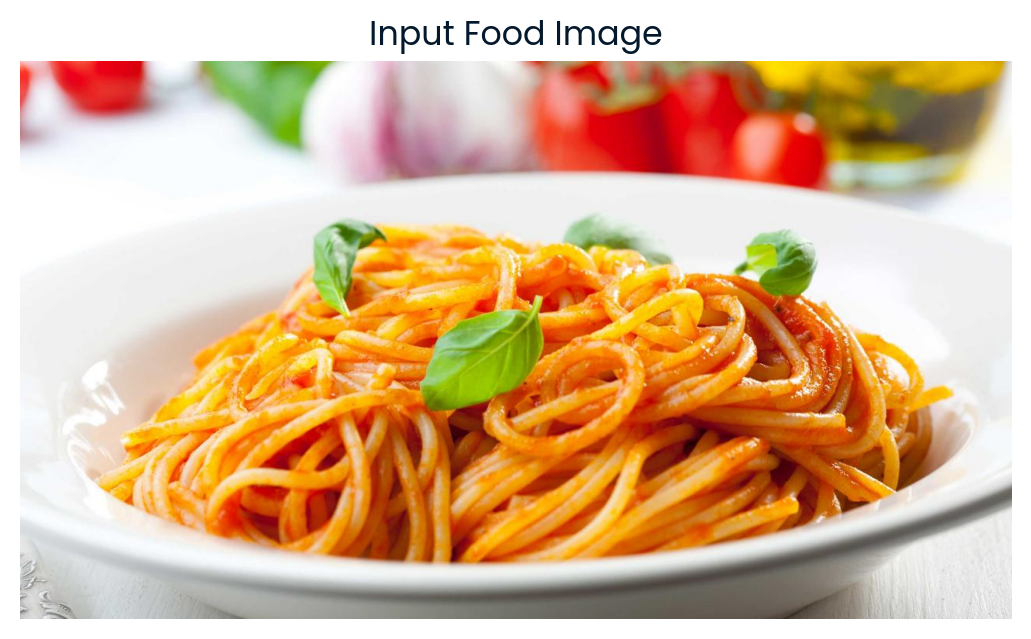

Displaying colored image


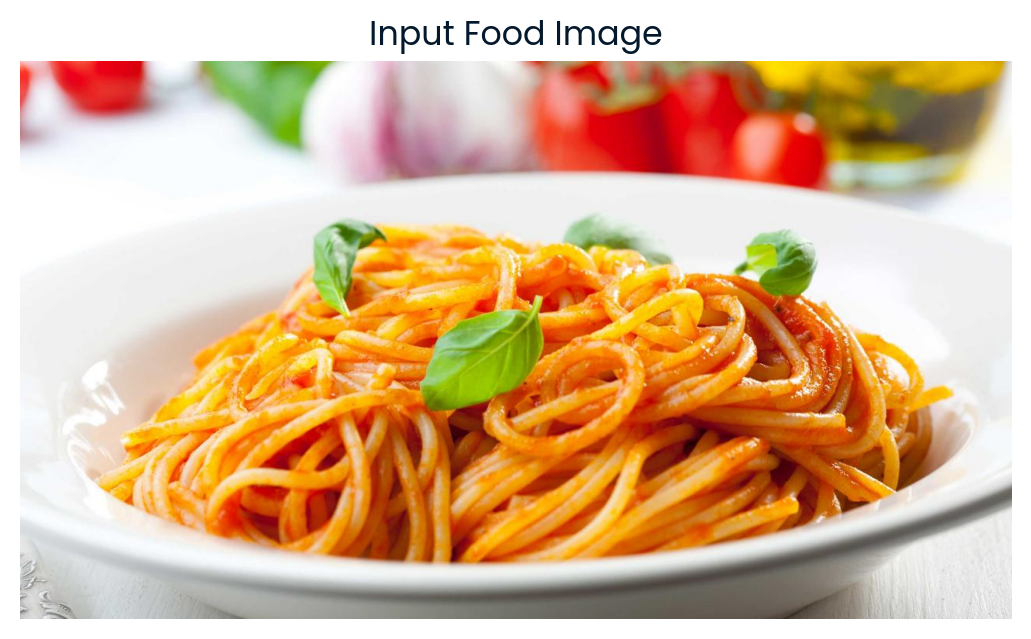

In [6]:
from transformers import pipeline
from PIL import Image

# Load the food image (replace path as needed)
image = Image.open("Food Pictures/food_1.png")  # Replace with your file path
print('Displaying original image')
display_image(image)


image = convert_to_rgb(image)
print('Displaying colored image')
display_image(image)



## Lets investigate more about this image

In [7]:
# ok so image is an PIL.Image object
print(type(image))

# visualizing the image dimensions
print(image.size)

# visualizing array dimensions
print(np.array(image).shape)

<class 'PIL.Image.Image'>
(1280, 720)
(720, 1280, 3)


## Step 3. Let's do the actual image classification

In the following code, notice that I use top_k = 5, which means I am asking the model to only display the top 5 classification labels and their scores. Without specifying it, we will only get a single answer (The category with the highest score), I think defaul value of top_k is 5. So we should store that in class_scores

#### Why top_k = 5 is useful in classification:
- Users sometimes upload unclear images, top-1 might be wrong
- You can show user something like - did you mean pizza or calzone?
- It helps evaluate model uncertainty.
- More useful in analytics, UI suggestions, and recommendations.

Score is usually the softmax output of the model. It reflects model confidence and ranges from 0 to 1. 

In [8]:
# Load food classification pipeline
pipe = pipeline("image-classification", model="nateraw/food")

# Run classification
class_scores = pipe(image)

# Print results
print(class_scores)



Downloading:   0%|          | 0.00/5.58k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/344M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

[{'score': 0.992975115776062, 'label': 'spaghetti_bolognese'}, {'score': 0.0026719518937170506, 'label': 'spaghetti_carbonara'}, {'score': 0.0002339343773201108, 'label': 'ravioli'}, {'score': 0.00018298211216460913, 'label': 'pad_thai'}, {'score': 9.571584814693779e-05, 'label': 'ramen'}]


In [9]:
highest_probability_class = class_scores[0]['label']
print(highest_probability_class)

spaghetti_bolognese


## We can experiment with various food images. They dont need to have same dimensions, the beauty of hugging face transformers library is, it handles the processing internally and make things so much simpler for us. 

## Let's test another food here

We will be testing a poular north Indian food called Khichdi and see if this model is able to recognize it. 

Displaying original image


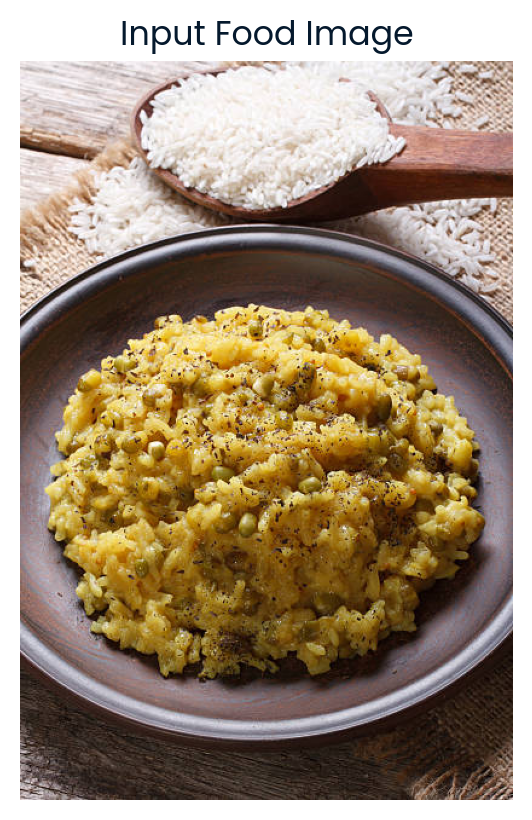

Displaying colored image


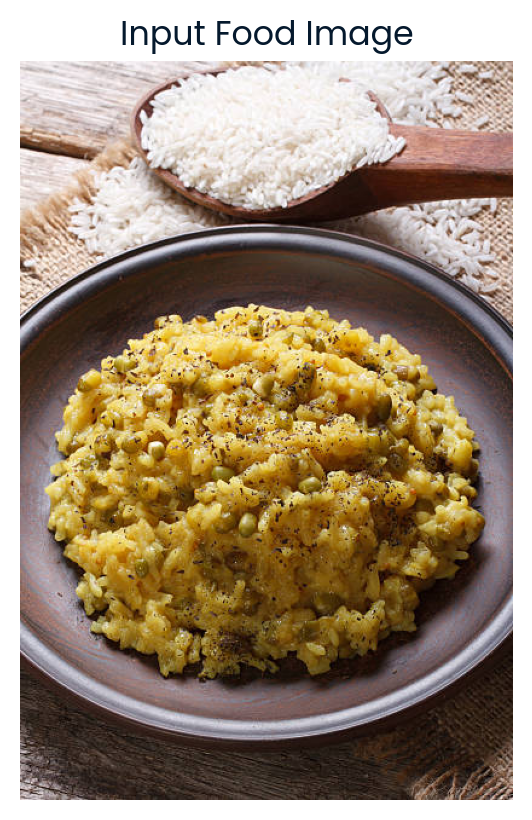

In [10]:
# Load the food image (replace path as needed)
image = Image.open("Food Pictures/khichdi_picture.jpg")  # Replace with your file path
print('Displaying original image')
display_image(image)


image = convert_to_rgb(image)
print('Displaying colored image')

display_image(image)

In [11]:
# Load food classification pipeline
pipe = pipeline("image-classification", model="nateraw/food")

# Run classification
class_scores = pipe(image)

# Print results
print(class_scores)



[{'score': 0.9931309819221497, 'label': 'risotto'}, {'score': 0.0018080135341733694, 'label': 'fried_rice'}, {'score': 0.0011131234932690859, 'label': 'paella'}, {'score': 0.00020754404249601066, 'label': 'gnocchi'}, {'score': 0.00012928432261105627, 'label': 'shrimp_and_grits'}]


### Haha model thinks its a risotto!